# **Install & Import Library**

In [1]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 904.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 21.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
   

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import RootMeanSquaredError

# **Data Loading**

In [3]:
#Import Data Selected Article from preprocessing before
df_article = pd.read_csv('https://raw.githubusercontent.com/capstone-bangkidss/Scholarseeks-ML/main/Dataset/Articles%20Selected.csv')
df_article

,article_id,authors,author_full_name,title,year,source_title,cited_by,abstract,references,language,index_keywords
0,0,Schulman J.; Levine S.; Moritz P.; Jordan M.; ...,"Schulman, John (55921038800); Levine, Sergey (...",Trust region policy optimization,2015,32nd International Conference on Machine Learn...,3732,"In this article, we describe a method for opti...","Bagnell J.A., Schneider J., Covariant policy s...",English,Approximation algorithms; Artificial intellige...
1,1,Hutto C.J.; Gilbert E.,"Hutto, C.J. (55394634800); Gilbert, Eric (1551...",VADER: A parsimonious rule-based model for sen...,2014,Proceedings of the 8th International Conferenc...,2965,The inherent nature of social media content po...,"Agarwal A., Xie B., Vovsha I., Rambow O., Pass...",English,Artificial intelligence; Data mining; Social n...
2,2,Kohavi R.,"Kohavi, Ron (56355116300)",A Study of Cross-Validation and Bootstrap for ...,1995,IJCAI International Joint Conference on Artifi...,8922,We review accuracy estimation methods and comp...,"Bailey T L, Elkan C, Estimating the at curacy ...",English,Classification (of information); Accuracy esti...
3,3,Brendan McMahan H.; Moore E.; Ramage D.; Hamps...,"Brendan McMahan, H. (6506837280); Moore, Eider...",Communication-efficient learning of deep netwo...,2017,Proceedings of the 20th International Conferen...,7471,Modern mobile devices have access to a wealth ...,"Abadi M., Chu A., Goodfellow I., McMahan B., M...",English,Artificial intelligence; Character recognition...
4,4,Sheikh H.R.; Bovik A.C.,"Sheikh, Hamid Rahim (7006576714); Bovik, Alan ...",Image information and visual quality,2006,IEEE Transactions on Image Processing,3235,Measurement of visual quality is of fundamenta...,"Sheikh H.R., Bovik A.C., de Veciana G., An inf...",English,Algorithms; Artificial Intelligence; Biomimeti...
...,...,...,...,...,...,...,...,...,...,...,...
2763,2983,Manchester R.A.,"Manchester, Ralph A. (7004270803)",Progress in performing arts medicine,2010,Medical Problems of Performing Artists,3,[No abstract available],"Milestones in NLM History, (2006); Fact Sheet ...",English,Abstracting and Indexing as Topic; Drama; Holi...
2764,2986,Machková M.,"Machková, Markéta (58076196300)",Enacting Inner Speech on the Academic Stage. A...,2023,Integrative Psychological and Behavioral Science,2,The recently published Springer Brief in cultu...,"Alderson-Day B., Fernyhough C., Inner speech: ...",English,Emotions; Humans; Speech; article; attention; ...
2765,2987,Graham M.E.; Fabricius A.,"Graham, Megan E. (56749349300); Fabricius, And...",Against environmental anaesthesia: investigati...,2021,Arts and Health,3,Secure long-term care units come with a unique...,"Borgen L., Guldahl A.S., Great-granny’s garden...",English,Aged; Art Therapy; Behavior Therapy; Dementia;...
2766,2993,Harrison D.,"Harrison, Dew (26649438400)",Handbook of research on digital media and crea...,2015,Handbook of Research on Digital Media and Crea...,2,Emerging technologies enable a wide variety of...,references,English,Digital storage; Art and cultures; Creative Te...


In [4]:
#Import Data Dummy Ratings
df_rating = pd.read_csv("https://raw.githubusercontent.com/capstone-bangkidss/Scholarseeks-ML/main/Dataset/Ratings.csv")
df_rating

,user_id,article_id,article_rating
0,736,111,1
1,118,1265,10
2,1946,2075,6
3,1649,2138,7
4,930,1176,8
...,...,...,...
9995,824,2517,4
9996,2140,122,2
9997,1927,111,2
9998,1951,736,4


In [5]:
#Import Data Dummy Users
df_user = pd.read_csv("https://raw.githubusercontent.com/capstone-bangkidss/Scholarseeks-ML/main/Dataset/Users.csv")
df_user

,user_id,name
0,641,Megan Robinson
1,1543,Angelica Butler
2,147,Veronica Sharp
3,3469,Michael Robinson
4,1248,David Hampton
...,...,...
4995,3132,Brenda Roberts
4996,3915,Cassandra Garcia
4997,3163,Victor Garcia
4998,4791,Jeffrey Kennedy


In [6]:
#Rename Dataset Rating
df_rating.rename(columns={
    'user_id' : 'user_id',
    'article_id' : 'article_id',
    'article_rating' : 'rating',
}, inplace=True)

df_rating

,user_id,article_id,rating
0,736,111,1
1,118,1265,10
2,1946,2075,6
3,1649,2138,7
4,930,1176,8
...,...,...,...
9995,824,2517,4
9996,2140,122,2
9997,1927,111,2
9998,1951,736,4


In [7]:
#Rename Dataset User
df_user.rename(columns={
    'User ID'  : 'user_id',
    'Name'     : 'name',
}, inplace=True)

df_user

,user_id,name
0,641,Megan Robinson
1,1543,Angelica Butler
2,147,Veronica Sharp
3,3469,Michael Robinson
4,1248,David Hampton
...,...,...
4995,3132,Brenda Roberts
4996,3915,Cassandra Garcia
4997,3163,Victor Garcia
4998,4791,Jeffrey Kennedy


In [8]:
# Merge ratings with articles and users for better context
merged_df = pd.merge(df_rating, df_article, on='article_id')
merged_df = pd.merge(merged_df, df_user, on='user_id')

#**Modelling**

In [9]:
def build_and_train_model(df_article, df_rating, df_user, embedding_dim=30, epochs=30, batch_size=20):
    # Encode user_id and article_id
    user_ids = merged_df['user_id'].unique().tolist()
    article_ids = merged_df['article_id'].unique().tolist()

    user2user_encoded = {x: i for i, x in enumerate(user_ids)}
    article2article_encoded = {x: i for i, x in enumerate(article_ids)}

    merged_df['user'] = merged_df['user_id'].map(user2user_encoded)
    merged_df['article'] = merged_df['article_id'].map(article2article_encoded)

    num_users = len(user2user_encoded)
    num_articles = len(article2article_encoded)

    merged_df['rating'] = merged_df['rating'].values.astype(np.float32)

    # Train-test split
    x = merged_df[['user', 'article']].values
    y = merged_df['rating'].values

    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)

    # Define the model
    # User embedding
    user_input = Input(shape=(1,), name='user')
    user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, name='user_embedding')(user_input)
    user_vec = Flatten(name='flatten_user')(user_embedding)

    # Article embedding
    article_input = Input(shape=(1,), name='article')
    article_embedding = Embedding(input_dim=num_articles, output_dim=embedding_dim, name='article_embedding')(article_input)
    article_vec = Flatten(name='flatten_article')(article_embedding)

    # Concatenate the embeddings
    concat = Concatenate()([user_vec, article_vec])

    # Fully connected layer
    dense = Dense(128, activation='relu')(concat)
    output = Dense(1, activation='sigmoid')(dense)

    # Model
    model = Model(inputs=[user_input, article_input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.000001),
                  loss=BinaryCrossentropy(),
                  metrics=[RootMeanSquaredError()])

    # Training the model
    history = model.fit([x_train[:, 0], x_train[:, 1]], y_train,
                        validation_data=([x_val[:, 0], x_val[:, 1]], y_val),
                        epochs=epochs,
                        batch_size=batch_size)

    return model, history, user2user_encoded, article2article_encoded

In [13]:
#Function To Load Model
def recommend_articles(model, user_id, df_article, df_rating, df_user, user2user_encoded, article2article_encoded, num_recommendations=10):
    if user_id in user2user_encoded:
        # User is found in the database
        user_encoded = user2user_encoded[user_id]
        user_ratings = df_rating[df_rating['user_id'] == user_id]
        rated_article_ids = user_ratings['article_id'].tolist()
        rated_article_indices = [article2article_encoded[article_id] for article_id in rated_article_ids]

        # Generate article IDs for prediction
        article_ids = np.array(list(article2article_encoded.keys()))
        article_indices = np.array(list(article2article_encoded.values()))

        # Filter out already rated articles
        mask = np.isin(article_indices, rated_article_indices, invert=True)
        article_ids = article_ids[mask]
        article_indices = article_indices[mask]

        user_array = np.full(len(article_ids), user_encoded)
        prediction_input = [user_array, article_indices]

        # Get model predictions
        ratings_pred = model.predict(prediction_input).flatten()

        # Sort predictions and get top recommendations
        top_indices = ratings_pred.argsort()[-num_recommendations:][::-1]
        top_article_ids = article_ids[top_indices]
        top_articles = df_article[df_article['article_id'].isin(top_article_ids)].sort_values(by='cited_by', ascending=False)
    else:
        # User not found, recommend top-rated articles overall
        avg_ratings = df_rating.groupby('article_id')['rating'].mean().sort_values(ascending=False)
        top_article_ids = avg_ratings.index[:num_recommendations].tolist()
        top_articles = df_article[df_article['article_id'].isin(top_article_ids)].sort_values(by='cited_by', ascending=False)

    return top_articles

model, history, user2user_encoded, article2article_encoded = build_and_train_model(df_article, df_rating, df_user)

Epoch 1/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.6729 - root_mean_squared_error: 5.7981 - val_loss: 0.6596 - val_root_mean_squared_error: 5.7462
Epoch 2/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6552 - root_mean_squared_error: 5.7892 - val_loss: 0.6417 - val_root_mean_squared_error: 5.7455
Epoch 3/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6361 - root_mean_squared_error: 5.7695 - val_loss: 0.6238 - val_root_mean_squared_error: 5.7447
Epoch 4/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6185 - root_mean_squared_error: 5.8117 - val_loss: 0.6058 - val_root_mean_squared_error: 5.7439
Epoch 5/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.6020 - root_mean_squared_error: 5.7614 - val_loss: 0.5876 - val_root_mean_squared_error: 5.7431
Epoch 6/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5858 - root_mean_squared_error: 5.7093 - val_loss: 0.5695 - val_root_mean_squared_error: 5.7423
Epoch 7/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step 

In [14]:
user_id = 1
num_recommendations = 10

top_articles = recommend_articles(model, user_id, df_article, df_rating, df_user, user2user_encoded, article2article_encoded, num_recommendations)
print("Top Recommendations for User", user_id, ":")
print(top_articles[['title', 'authors', 'cited_by']])

77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Top Recommendations for User 1 :
                                                  title  \
1246  Present state and future of the world's mangro...   
598   Consolidated bioprocessing of cellulosic bioma...   
1267  Effects of particle composition and species on...   
632   Design principles of photo-bioreactors for cul...   
2152  Current status and technical description of Ch...   
403   Producing microbial polyhydroxyalkanoate (PHA)...   
1109  Field demonstration of successful bioaugmentat...   
1149         Adaptive management: Promises and pitfalls   
2261  The feasibility of hydrogen storage for mixed ...   
2693  The Artistic Infant Directed Performance: A My...   

                                                authors  cited_by  
1246                                        Alongi D.M.      1401  
598     Lynd L.R.; Van Zyl W.H.; McBride J.E.; Laser M.      1181  
1267  Griffitt R.J.; Luo J.; Gao J.; Bonzongo J.-C.;...       777  
632   

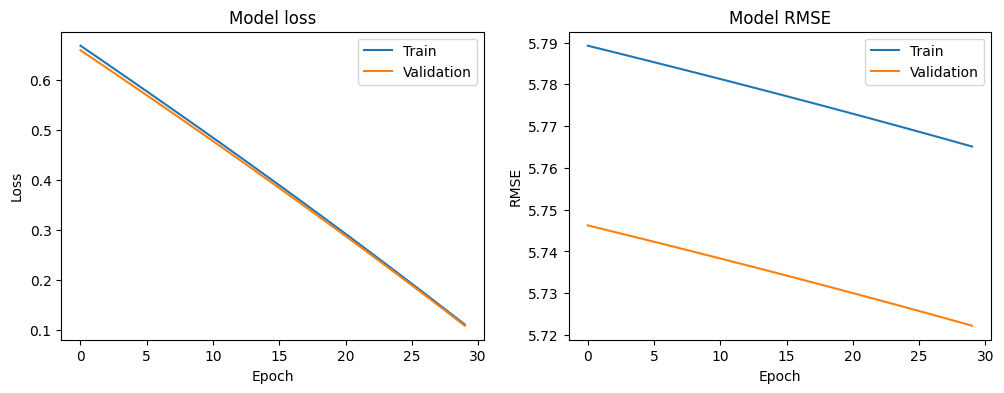

In [15]:
#Visualize the Model
def plot_history(history):
    # Plot training & validation loss values
    plt.figure(figsize=(12, 4))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    # RMSE plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['root_mean_squared_error'])
    plt.plot(history.history['val_root_mean_squared_error'])
    plt.title('Model RMSE')
    plt.ylabel('RMSE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

plot_history(history)

# **Save Model**

In [27]:
from tensorflow import keras
from tensorflow.keras.models import load_model, save_model
from keras.models import load_model, save_model

In [30]:
saved_model_path_h5 = "./CollaborativeFilteringModel.h5"
model.save(saved_model_path_h5)


In [31]:
saved_model_path_keras = "./CollaborativeFilteringModel.keras"
model.save(saved_model_path_keras)

In [17]:
!tensorflowjs_converter --input_format=keras "./CollaborativeFilteringModel.h5" ./

2024-06-16 17:36:02.450243: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
failed to lookup keras version from the file,
    this is likely a weight only file


In [18]:
!zip submission.zip *.bin model.json

  adding: group1-shard1of1.bin (deflated 8%)
  adding: model.json (deflated 79%)
